<div style="line-height:0.45">
<h1 style="color:#F10C7F  "> Decision Trees 2 </h1>
</div>
<div style="line-height:0.5">
<h4> Decision Trees with sklearn.
</h4>
</div>
<div style="margin-top: 4px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> sklearn trees + pruning + graphviz + pydotplus + docstr decorator

</span>
</div>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Image
import graphviz
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree._tree import TREE_LEAF, TREE_UNDEFINED

In [2]:
def docstr(method_name):
    """ Decorator => Create a docs_file copying all defined docstrings! 
        
        Parameters: 
            - Name of the method that will be written in the doc file,\\ 
            since it is not accesible like usual using the f.__name__.
        
        Details: 
            - Create an empty file if it doesn't exist and just pass.
            - Write in the txt file the name of the method (or class) and its docstring.
            - Close the file, to handle the creation and writing of the file separately from the writing of the docstring.
                To avoid that other text "that comes from nowhere" is written in the doc file.
            - Add dashed separators -------
        
        Returns:
            Decorator object
    """        
    def decorator(f):
        doc_filename = "docs_decision_trees_2.txt"

        if not os.path.exists(doc_filename):
            with open(doc_filename, "w") as file:
                pass
            file.close()
            
        with open(doc_filename, "a") as file:
            file.write(f"\nMethod: {method_name}\n")
            if f.__doc__:
                file.write(f.__doc__ + "\n\n")
            else:
                file.write("\n\n")
            
            file.write("-" * 100 + "\n\n")

        return f

    return decorator

In [4]:
data_rotterdam = pd.read_csv("./data_trees/rotterdam.csv") #, sep=";", header=0)
data_rotterdam

,Unnamed: 0,pid,year,age,meno,size,grade,nodes,pgr,er,hormon,chemo,rtime,recur,dtime,death
0,1393,1,1992,74,1,<=20,3,0,35,291,0,0,1799,0,1799,0
1,1416,2,1984,79,1,20-50,3,0,36,611,0,0,2828,0,2828,0
2,2962,3,1983,44,0,<=20,2,0,138,0,0,0,6012,0,6012,0
3,1455,4,1985,70,1,20-50,3,0,0,12,0,0,2624,0,2624,0
4,977,5,1983,75,1,<=20,3,0,260,409,0,0,4915,0,4915,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977,1893,3003,1990,73,1,20-50,3,1,167,142,0,0,1990,0,1990,1
2978,2945,3004,1987,75,1,>50,3,11,5,20,1,0,45,0,45,1
2979,2775,3005,1985,79,1,20-50,3,6,189,21,0,0,582,0,582,1
2980,1169,3006,1983,71,1,<=20,3,0,0,55,0,0,4972,0,4972,1


In [5]:
data_rotterdam = data_rotterdam.rename(columns={'Unnamed: 0': 'globalid'})
data_rotterdam

,globalid,pid,year,age,meno,size,grade,nodes,pgr,er,hormon,chemo,rtime,recur,dtime,death
0,1393,1,1992,74,1,<=20,3,0,35,291,0,0,1799,0,1799,0
1,1416,2,1984,79,1,20-50,3,0,36,611,0,0,2828,0,2828,0
2,2962,3,1983,44,0,<=20,2,0,138,0,0,0,6012,0,6012,0
3,1455,4,1985,70,1,20-50,3,0,0,12,0,0,2624,0,2624,0
4,977,5,1983,75,1,<=20,3,0,260,409,0,0,4915,0,4915,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977,1893,3003,1990,73,1,20-50,3,1,167,142,0,0,1990,0,1990,1
2978,2945,3004,1987,75,1,>50,3,11,5,20,1,0,45,0,45,1
2979,2775,3005,1985,79,1,20-50,3,6,189,21,0,0,582,0,582,1
2980,1169,3006,1983,71,1,<=20,3,0,0,55,0,0,4972,0,4972,1


In [6]:
data_rotterdam.dtypes

globalid     int64
pid          int64
year         int64
age          int64
meno         int64
size        object
grade        int64
nodes        int64
pgr          int64
er           int64
hormon       int64
chemo        int64
rtime        int64
recur        int64
dtime        int64
death        int64
dtype: object

In [7]:
size_type = type(data_rotterdam['size'][0])
size_type

str

In [8]:
# Apply One-Hot-Encoding 
one_hot = pd.get_dummies(data_rotterdam['size'])
targets = data_rotterdam['death']

one_hot, targets

(      20-50  <=20  >50
 0         0     1    0
 1         1     0    0
 2         0     1    0
 3         1     0    0
 4         0     1    0
 ...     ...   ...  ...
 2977      1     0    0
 2978      0     0    1
 2979      1     0    0
 2980      0     1    0
 2981      0     1    0
 
 [2982 rows x 3 columns],
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 2977    1
 2978    1
 2979    1
 2980    1
 2981    1
 Name: death, Length: 2982, dtype: int64)

In [9]:
#### Delete old columns - attach at the end encoded + target cols
data_r = data_rotterdam.drop('size', axis = 1)
data_rotterdam_ok = data_r.drop('death', axis = 1)
data_rotterdam_ok = data_rotterdam_ok.join(one_hot)
data_rotterdam_ok = data_rotterdam_ok.join(targets)
data_rotterdam_ok

,globalid,pid,year,age,meno,grade,nodes,pgr,er,hormon,chemo,rtime,recur,dtime,20-50,<=20,>50,death
0,1393,1,1992,74,1,3,0,35,291,0,0,1799,0,1799,0,1,0,0
1,1416,2,1984,79,1,3,0,36,611,0,0,2828,0,2828,1,0,0,0
2,2962,3,1983,44,0,2,0,138,0,0,0,6012,0,6012,0,1,0,0
3,1455,4,1985,70,1,3,0,0,12,0,0,2624,0,2624,1,0,0,0
4,977,5,1983,75,1,3,0,260,409,0,0,4915,0,4915,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977,1893,3003,1990,73,1,3,1,167,142,0,0,1990,0,1990,1,0,0,1
2978,2945,3004,1987,75,1,3,11,5,20,1,0,45,0,45,0,0,1,1
2979,2775,3005,1985,79,1,3,6,189,21,0,0,582,0,582,1,0,0,1
2980,1169,3006,1983,71,1,3,0,0,55,0,0,4972,0,4972,0,1,0,1


In [10]:
rot_features = list(data_rotterdam_ok.columns)
data_rotterdam_ok.columns

Index(['globalid', 'pid', 'year', 'age', 'meno', 'grade', 'nodes', 'pgr', 'er',
       'hormon', 'chemo', 'rtime', 'recur', 'dtime', '20-50', '<=20', '>50',
       'death'],
      dtype='object')

In [11]:
X = data_rotterdam_ok[rot_features]
X = X.iloc[:,:-1]
y = data_rotterdam_ok['death']

# Split into Training, Validation and Test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2 , random_state=12)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=12)

<div style="line-height:0.65">
<h3 style="color:#F10C7F  "> Multiple criteria to measure the quality of a split: </h3>
</div>

+ 'gini' (Gini impurity): Measure of impurity (or disorder) in a node.     
    It quantifies the probability of misclassifying a randomly chosen element from the node.    
+ 'entropy' (Information gain): Measure of impurity based on information theory.     
It calculates the expected amount of information needed to classify a sample from the node.    
+ 'misclassification' (Misclassification error rate): Fraction of misclassified samples in a node. 

"Gini" impurity is slightly faster to compute since it doesn't involve logarithmic calculations,    
while entropy may be more sensitive to multiway splits and can handle continuous features more naturally.    
"Misclassification" error is simpler but less commonly used => sensitivity to class imbalance!

The DecisionTreeClassifier need to know the minimum number of samples required to split an internal node (defualt = 2)

- int, then consider min_samples_split as the minimum number.
- float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

The DecisionTreeClassifier expand all nodes according to "max_depth". If not specified the default is "None".    
In the latter case nodes are explanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [12]:
""" Create an instance of classifier with customized parameters.
Specify the impurity criterion since by default the DecisionTreeClassifier uses the Gini one. 
"""
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, random_state=12) 
# Train
clf.fit(X_train, y_train);

In [13]:
# Predict
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0])

### => Metrics

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8963210702341137
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       165
           1       0.91      0.86      0.88       134

    accuracy                           0.90       299
   macro avg       0.90      0.89      0.89       299
weighted avg       0.90      0.90      0.90       299

Confusion Matrix:
 [[153  12]
 [ 19 115]]


### => Post-pruning

In [15]:
@docstr("check_is_leaf")
def check_is_leaf(inner_tree, index):
    """ Check if a node is a leaf. 
        In sklearn's decision trees, each node in the tree is represented by an index value.

Parameters:
    - Inner tree object [sklearn.tree._tree.Tree].
    - Index of the node to check [int].

Returns:
    True if the node is a leaf, False otherwise [bool].
    """
    return (inner_tree.children_left[index] == TREE_LEAF and 
            inner_tree.children_right[index] == TREE_LEAF)

@docstr("prune_index")
def prune_index(inner_tree, decisions, index=0):
    """ Prune the tree, removing nodes, from the bottom.\\

Parameters:
    - Inner tree object [sklearn.tree._tree.Tree]
    - List of decisions for each node.
    - Index of the current node. [int, optional]

Details: 
    - Start from the bottom to avoid that the nodes that become leaves during pruning will be wrongly classified.
    - Prune children if both children are leaves now and make the same decision.
    - Turn node into a leaf by "unlinking" its children:
        TREE_LEAF is a scikit-learn constant that represents the value used to indicate that a node in the decision tree is a leaf node.\\
        By convention, TREE_LEAF is set to -1 in scikit-learn's implementation.\\
        If the children_left and children_right arrays of a node both have the value TREE_LEAF at that index,\\
            it indicates that the node is a leaf node, meaning it does not have any child nodes.

Notes: 
    Called by "prune_duplicate_leaves".
    """
    if not check_is_leaf(inner_tree, inner_tree.children_left[index]):
        prune_index(inner_tree, decisions, inner_tree.children_left[index])
    if not check_is_leaf(inner_tree, inner_tree.children_right[index]):
        prune_index(inner_tree, decisions, inner_tree.children_right[index])

    if (check_is_leaf(inner_tree, inner_tree.children_left[index]) and
        check_is_leaf(inner_tree, inner_tree.children_right[index]) and
        (decisions[index] == decisions[inner_tree.children_left[index]]) and 
        (decisions[index] == decisions[inner_tree.children_right[index]])):
        
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
        inner_tree.feature[index] = TREE_UNDEFINED
        
@docstr("prune_duplicate_leaves")
def prune_duplicate_leaves(mdl):
    """ Compute the decisions (labels) for each node in the decision tree model and then remove leaves if both decisions are the same.

Parameters:
    mdl -> The decision tree classifier model [sklearn.tree.DecisionTreeClassifier].

Details: 
    - Get the class labels (decisions) for each node in the decision tree model.
        - Access the value attribute of the decision tree model's inner tree structure\\
            (the counts of samples in each class for each node in the tree).
        - Compute the index of the max val along the third axis (2),\\
            to find the index corresponding to the class with the highest count for each node.
        - Flatten the resulting array, converting it from a multidimensional to a one-dimensional array.
        - Convert into a list.
    - Prune the tree
    """
    decisions = mdl.tree_.value.argmax(axis=2).flatten().tolist() 
    prune_index(mdl.tree_, decisions)

<div style="line-height:0.55">
<h2 style="color:#F10C7F  "> Features Importance </h2> 
</div>
The feature_importances_ attribute (array) is available in decision tree-based models     
to provide importance scores of each feature in the decision tree model,     
to indicate how much each feature contributed to the decision-making process of the tree.  <br> 
The higher the value, the more important the feature is in the decision tree's predictions.    <br>
--> After fitting the DecisionTreeClassifier model!

     Feature  Importance
1        pid    0.603020
13     dtime    0.233621
2       year    0.092256
3        age    0.032538
11     rtime    0.027002
4       meno    0.004155
7        pgr    0.003682
0   globalid    0.002151
8         er    0.001575
9     hormon    0.000000
10     chemo    0.000000
6      nodes    0.000000
12     recur    0.000000
5      grade    0.000000
14     20-50    0.000000
15      <=20    0.000000
16       >50    0.000000


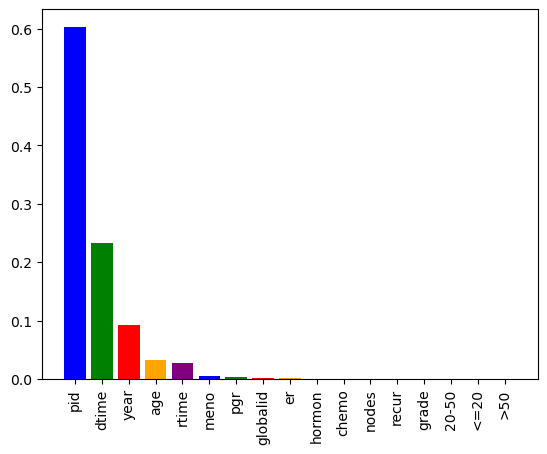

In [16]:
importance = clf.feature_importances_

# Create a DataFrame from Features and their Importance
feature_importance = pd.DataFrame(list(zip(rot_features, importance)), columns = ['Feature', 'Importance'])
# Sort the DataFrame by Importance
feature_importance = feature_importance.sort_values('Importance', ascending = False)

print(feature_importance)

### Display feature_importance
colors = ['blue', 'green', 'red', 'orange', 'purple']
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color=colors)
plt.xticks(rotation='vertical')
plt.show()

In [17]:
### Evaluate with metrics
c_accuracy = accuracy_score(y_test, y_pred)
c_report = classification_report(y_test, y_pred)
c_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", c_accuracy) 
print()
print("Classification Report: ")
print(c_report)
print()
print("Confusion Matrix:\n", c_matrix)
print()

Accuracy: 0.8963210702341137

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       165
           1       0.91      0.86      0.88       134

    accuracy                           0.90       299
   macro avg       0.90      0.89      0.89       299
weighted avg       0.90      0.90      0.90       299


Confusion Matrix:
 [[153  12]
 [ 19 115]]



In [18]:
rot_features = rot_features[:-1]
rot_features

['globalid',
 'pid',
 'year',
 'age',
 'meno',
 'grade',
 'nodes',
 'pgr',
 'er',
 'hormon',
 'chemo',
 'rtime',
 'recur',
 'dtime',
 '20-50',
 '<=20',
 '>50']

In [19]:
len(rot_features)

17

<div style="line-height:0.55">
<h3 style="color:#F10C7F  "> Graphviz graph visualization tool </h3> 
</div>

Graphviz is a powerful open-source graph visualization software that can be used to create various types of graphs and networks.     
It uses the DOT language to specify the graph structure and properties.   
  
Pydotplus  permits to create, manipulate, and render graphs using Graphviz from within current Python code.    
It acts as a bridge between Python and Graphviz, enabling to generate and work with DOT files programmatically,    
Pydotplus extends the functionality of the original Pydot library by adding support for additional features and improvements.    

In [20]:
""" Visualize the decision tree with Graphviz. 
Take the DOT data generated by export_graphviz and creates a pydotplus.graphviz.Dot object,
"""
dot_data = export_graphviz(clf, out_file=None, feature_names=rot_features, class_names=["0", "1"], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('prediction_tree_pruning.png')

True

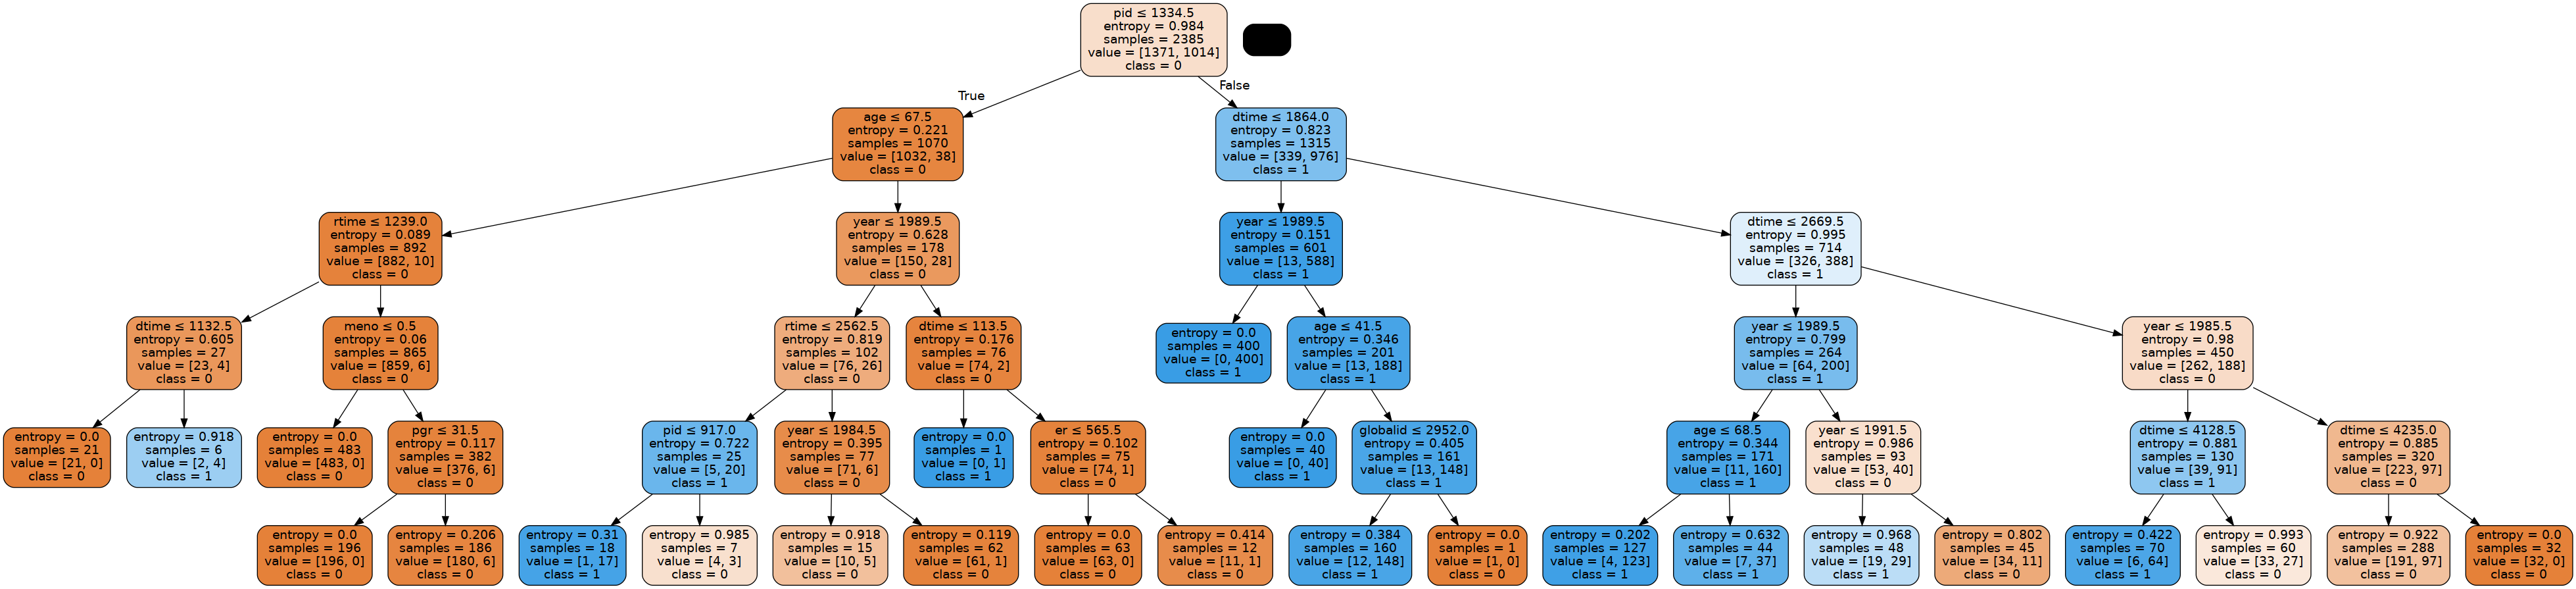

In [21]:
Image('prediction_tree_pruning.png')

<div style="line-height:0.45">
<h2 style="color:#F10C7F  "> Change model to improve prediction </h2>
</div>

<h3 style="color:#F10C7F  "> 1) increasing depth </h3>

In [22]:
""" Just increasing the depth the accuracy increase! """ 

clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10, random_state=12)
# Train
clf.fit(X_train, y_train);
# Predict
y_pred = clf.predict(X_test)


print("Accuracy:", c_accuracy) 
print()
print("Classification Report: ")
print(c_report)
print()
print("Confusion Matrix:\n", c_matrix)
print()

Accuracy: 0.8963210702341137

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       165
           1       0.91      0.86      0.88       134

    accuracy                           0.90       299
   macro avg       0.90      0.89      0.89       299
weighted avg       0.90      0.90      0.90       299


Confusion Matrix:
 [[153  12]
 [ 19 115]]



<h3 style="color:#F10C7F  "> 2) Increasing min_samples_split </h3>

In [23]:
""" Just increasing the depth the accuracy increase! """ 

clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=50, random_state=12)
# Train
clf.fit(X_train, y_train);
# Predict
y_pred = clf.predict(X_test)

""" Just increasing the depth the accuracy increase! """ 
c_accuracy = accuracy_score(y_test, y_pred)
c_report = classification_report(y_test, y_pred)
c_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", c_accuracy) 
print()
print("Classification Report: ")
print(c_report)
print()
print("Confusion Matrix:\n", c_matrix)
print()

Accuracy: 0.9264214046822743

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       165
           1       0.89      0.95      0.92       134

    accuracy                           0.93       299
   macro avg       0.92      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299


Confusion Matrix:
 [[150  15]
 [  7 127]]



<div style="line-height:0.45">
<h3 style="color:#F10C7F  "> 3) Changing the criterion  </h3>
</div>

While both Gini impurity and entropy aim to minimize impurity, they have some differences that can impact their performance.
+ Gini is generally faster to compute (compared to entropy since) it does not involve logarithmic calculations. 
+ Gini tends to be less sensitive to class imbalance compared to entropy. 
+ Gini can handle continuous features naturally by choosing an appropriate threshold for splitting.   
Entropy requires discretization of continuous features, which can introduce some information loss.  


In [24]:
""" Switching to: 
"gini": reduce the performance. It measures the probability of misclassifying a randomly selected element from a given node. 

"log_loss": slightly increase the performance (cross-entropy loss).

On the other hand ...
specify the min_samples_leaf (minimum number of samples required to be at a leaf node) is useless. 
It can be used to control overfitting by preventing the tree from creating nodes with very few samples.
""" 

clf = DecisionTreeClassifier(criterion='gini', max_depth=50, min_samples_split=50, random_state=12) #, min_samples_leaf=15)
# Train
clf.fit(X_train, y_train);
# Predict
y_pred = clf.predict(X_test)

""" Just increasing the depth the accuracy increase! """ 
c_accuracy = accuracy_score(y_test, y_pred)
c_report = classification_report(y_test, y_pred)
c_matrix = confusion_matrix(y_test, y_pred)

print("---> GINI")
print("Accuracy:", c_accuracy) 
print()
print("Classification Report: ")
print(c_report)
print()
print("Confusion Matrix:\n", c_matrix)
print()

clf = DecisionTreeClassifier(criterion='log_loss', max_depth=50, min_samples_split=50, random_state=12) #, min_samples_leaf=15)
# Train
clf.fit(X_train, y_train);
# Predict
y_pred = clf.predict(X_test)

""" Just increasing the depth the accuracy increase! """ 
c_accuracy = accuracy_score(y_test, y_pred)
c_report = classification_report(y_test, y_pred)
c_matrix = confusion_matrix(y_test, y_pred)

print("---> LOG_LOSS")
print("Accuracy:", c_accuracy) 
print()
print("Classification Report: ")
print(c_report)
print()
print("Confusion Matrix:\n", c_matrix)
print()

---> GINI
Accuracy: 0.9063545150501672

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       165
           1       0.90      0.89      0.89       134

    accuracy                           0.91       299
   macro avg       0.91      0.90      0.91       299
weighted avg       0.91      0.91      0.91       299


Confusion Matrix:
 [[152  13]
 [ 15 119]]

---> LOG_LOSS
Accuracy: 0.9264214046822743

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       165
           1       0.91      0.93      0.92       134

    accuracy                           0.93       299
   macro avg       0.92      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299


Confusion Matrix:
 [[152  13]
 [  9 125]]



In [25]:
print(check_is_leaf.__doc__)

 Check if a node is a leaf. 
        In sklearn's decision trees, each node in the tree is represented by an index value.

Parameters:
    - Inner tree object [sklearn.tree._tree.Tree].
    - Index of the node to check [int].

Returns:
    True if the node is a leaf, False otherwise [bool].
    
